In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\ramiu\Desktop\MLOPSPROJECTS\ML_TEST\instagram_reach.csv")

In [4]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [5]:
df.shape

(100, 8)

In [6]:
# Display summary statistics for a dataframe
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


# eda


In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Unnamed: 0', 'S.No', 'Followers', 'Likes']

We have 4 categorical features : ['USERNAME', 'Caption', 'Hashtags', 'Time since posted']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

USERNAME
mikequindazzi           4.0
philosophercoin         2.0
opensourcedworkplace    2.0
thebeautymindset        1.0
iamjaradwright          1.0
                       ... 
cryptocrackhead         1.0
blocsidesports          1.0
neondistrictrpg         1.0
greenhousegroup         1.0
palmariusdev            1.0
Name: proportion, Length: 95, dtype: float64
---------------------------
Caption
Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s                                                                                                                                                                                                                                1.06383
Very impressed by the ingenuity of our PhD students. Great to meet you at @Siemens Young Researcher Forum in Nuremberg! You really drive                                                                                     

# numerical features

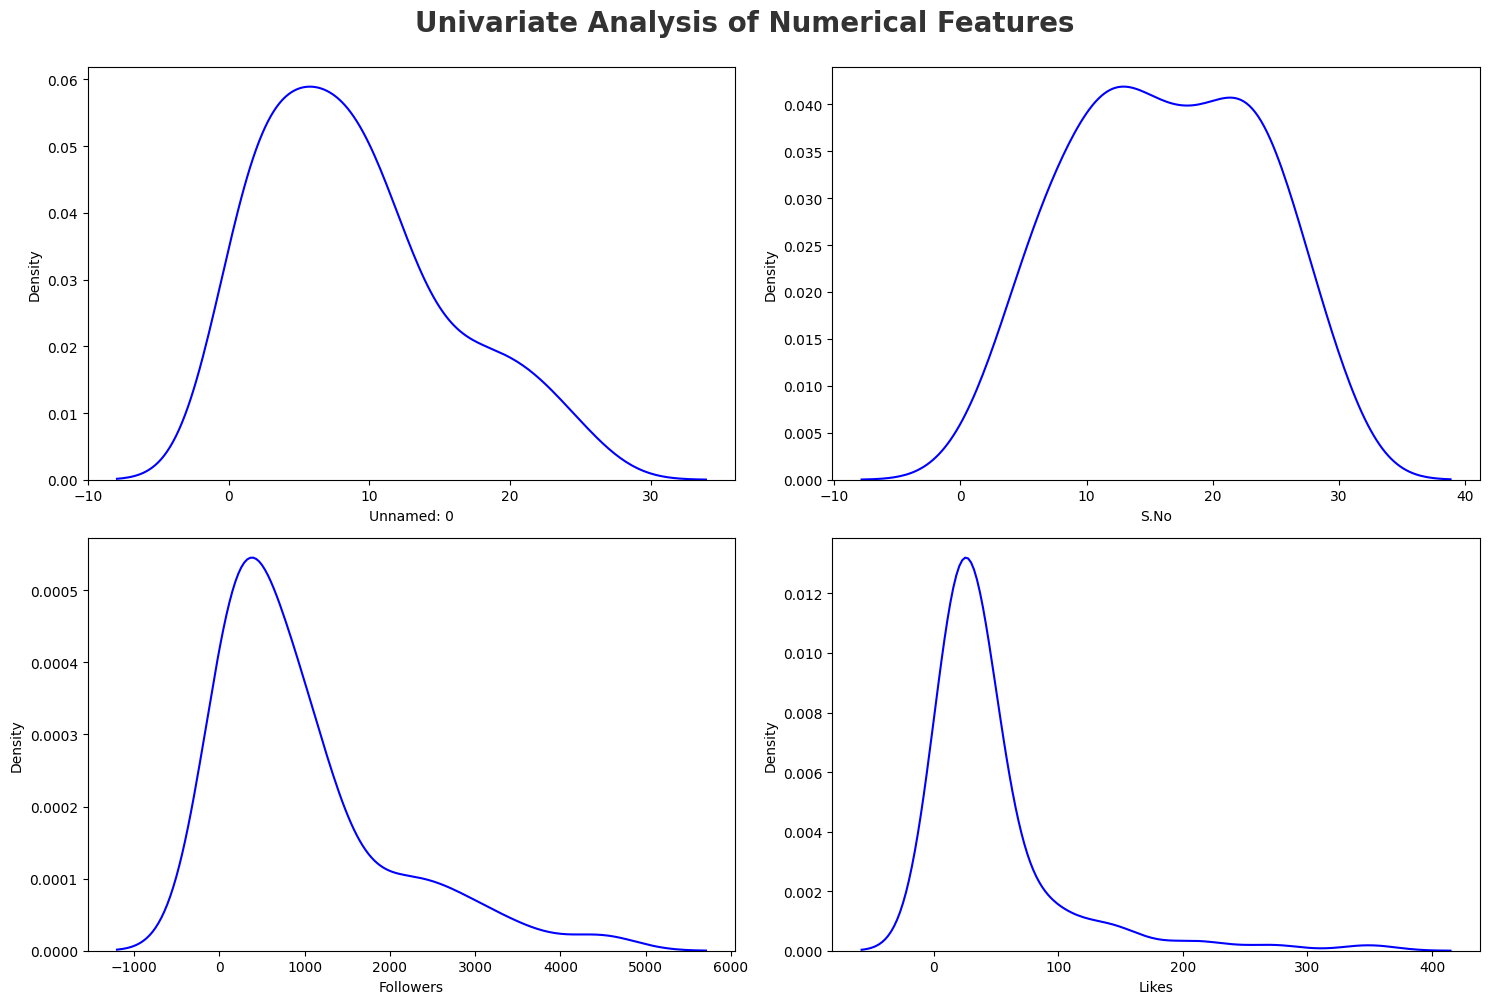

In [10]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

# categorical features

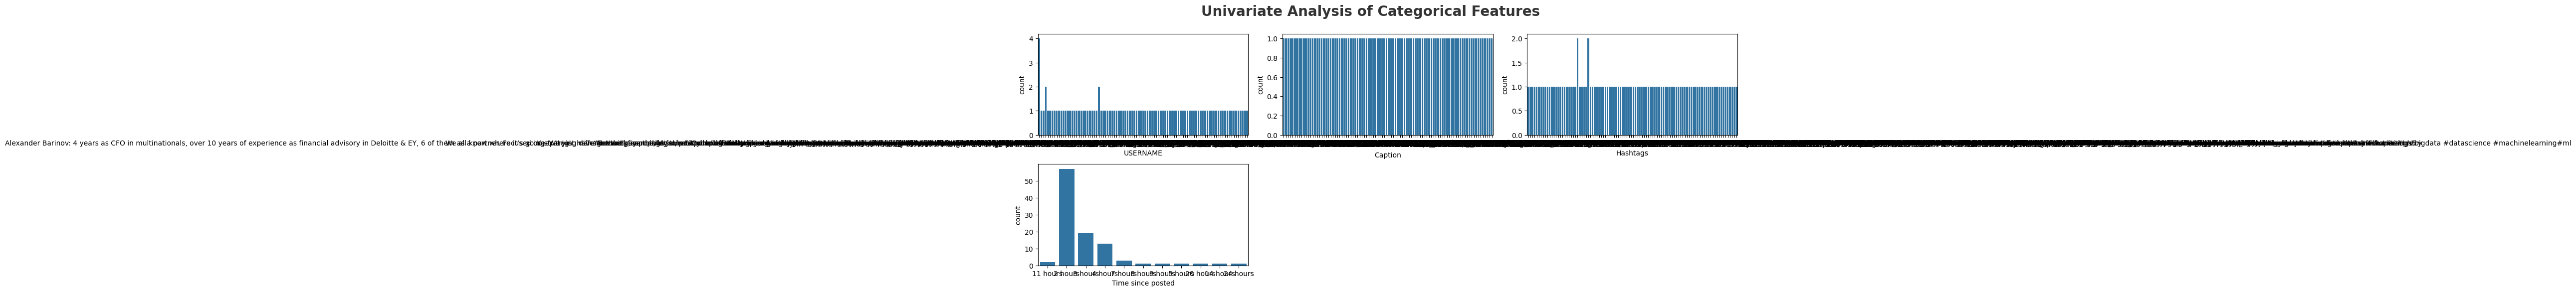

In [13]:
# categorical columns
#categorical_features.remove('S.No')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

In [14]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 4 continuous_features : ['Unnamed: 0', 'S.No', 'Followers', 'Likes']


# ### Check Multicollinearity in Numerical features

In [15]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [17]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Likes'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,USERNAME,Fail to Reject Null Hypothesis
1,Caption,Fail to Reject Null Hypothesis
2,Hashtags,Fail to Reject Null Hypothesis
3,Time since posted,Reject Null Hypothesis


In [18]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [19]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Unnamed: 0', 'S.No', 'Followers', 'Likes']


IndexError: index 3 is out of bounds for axis 0 with size 3

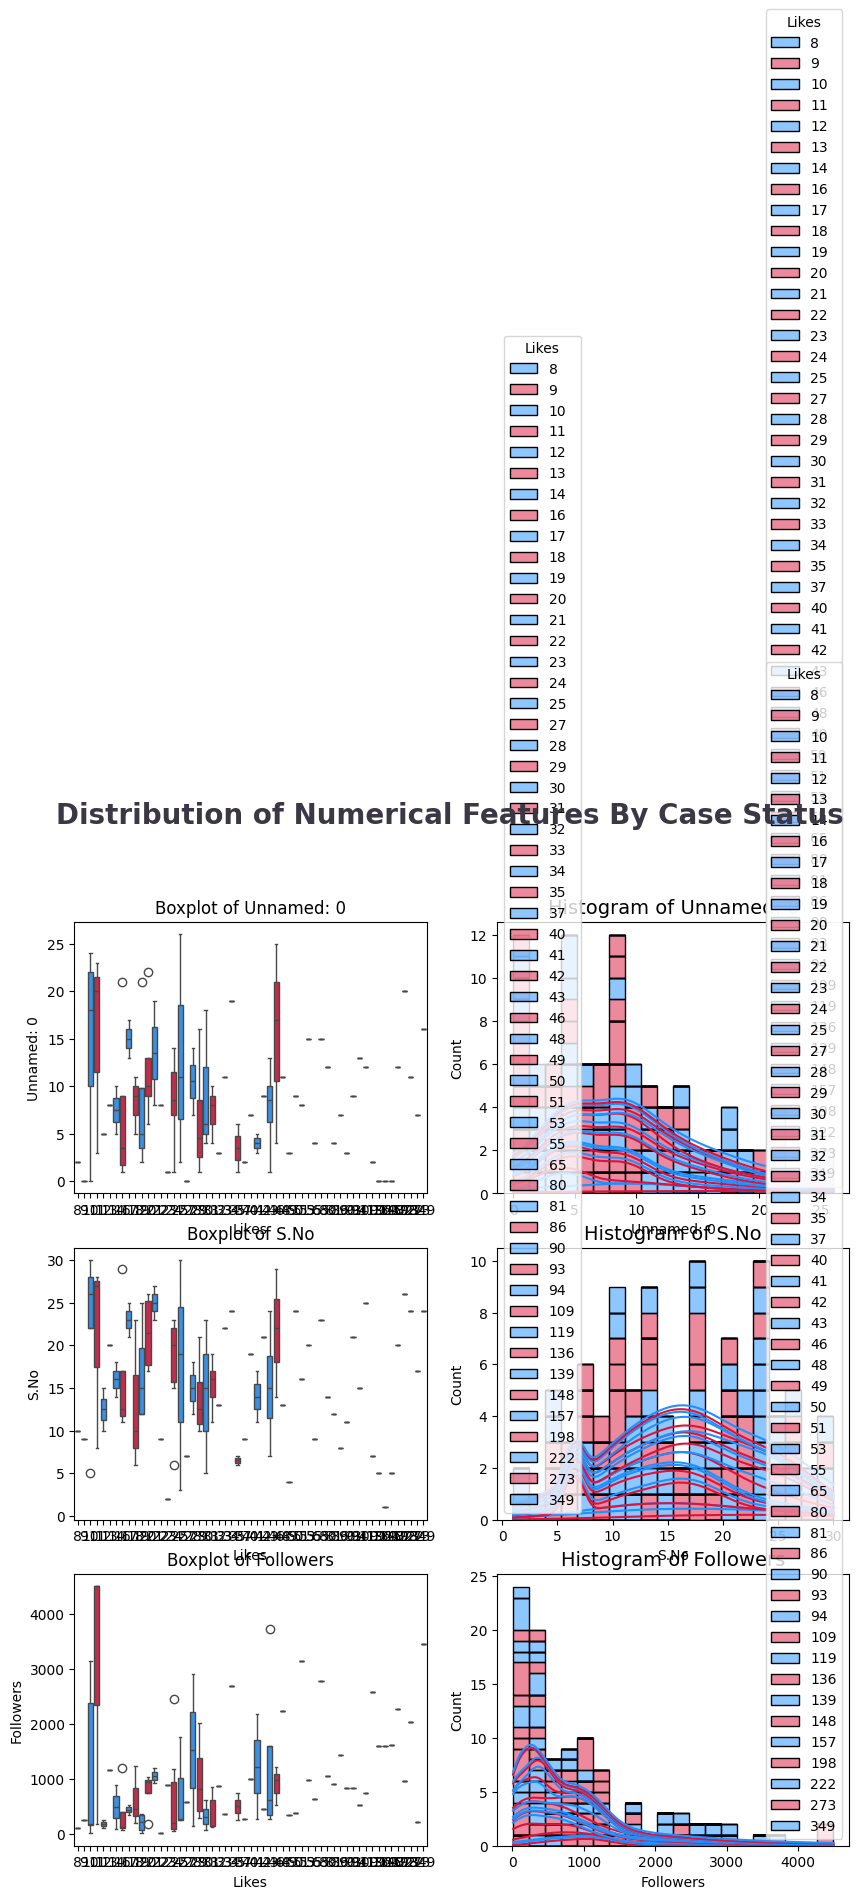

In [22]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='Likes', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Likes', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

In [32]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [33]:
#group data by continent and their count of case_status
df.groupby('Hashtags')['Likes'].value_counts(normalize=True).to_frame()*100

,,proportion
Hashtags,Likes,
#AI #machinelearning #artificialintelligence #careerservices #studentlearning,24,100.0
#livinginitaly #tuscanyitaly#summerinitaly🇮🇹 #startup #startuplife#artificialintelligence #algorithm#voicebiometrics #myvoiceai,21,100.0
#AI #DUBAI #artificialintelligence #neuralnetworks #datascience #bots #machinelearning #naturallanguageprocessing #dubai,10,100.0
#AI #machinelearning #auto#realtors #tech#fitness #socialselling#artificialintelligence#local #sanantonio#realestate #socialmedia#business #sa#generator #car #innovation#cardealers#entrepreneurs #COO #app#sales #ML,24,100.0
#Artificial #Intelligence #AI #MachineLearning #DeepLearning #Robotics #BigData #Dataviz #Analytics #SMM #IoT #Sensors #Xotiv #NLP #datascience #graph #graphanalysis #visualisation #image #analytics #imageanalytics #coder #software #business #Development,19,100.0
...,...,...
[#Infographic] #Wearable #Sensors #MachineLearning#IoT #BigData #DigitalTransformation#futureofwork #marketing #analytics#bigdata #Cloud #Blogging#ContentMarketing #DigitalMarketing ht: #BigData #MachineLearning #AI #IoT#infograp,18,100.0
monde_informatique#client #project#product #projectmanager,24,100.0
thebeautymindset#businessman#quoteoftheday #businessowner#businesswoman #success #grind#motivation #motivational #lifestyle#happiness #entrepreneurs#entrepreneurlife #business #working #founder#startup #money #magazine #moneymaker#startuplife #successful #passion #inspiredaily#hardwork #hardworkpaysoff #desire,31,100.0


# relation between followers and likes


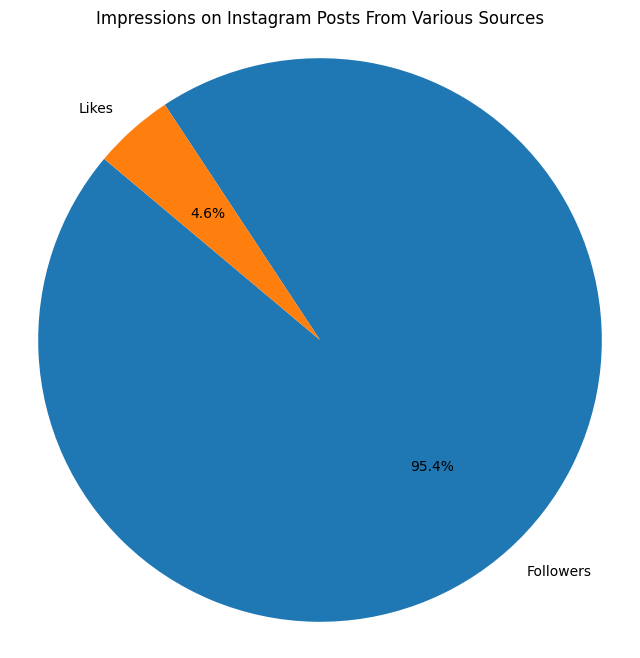

In [40]:
import matplotlib.pyplot as plt

# Calculate total followers and likes
followers = df["Followers"].sum()
likes = df["Likes"].sum()

# Create labels and values for the pie chart
labels = ['Followers', 'Likes']
values = [followers, likes]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Impressions on Instagram Posts From Various Sources')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


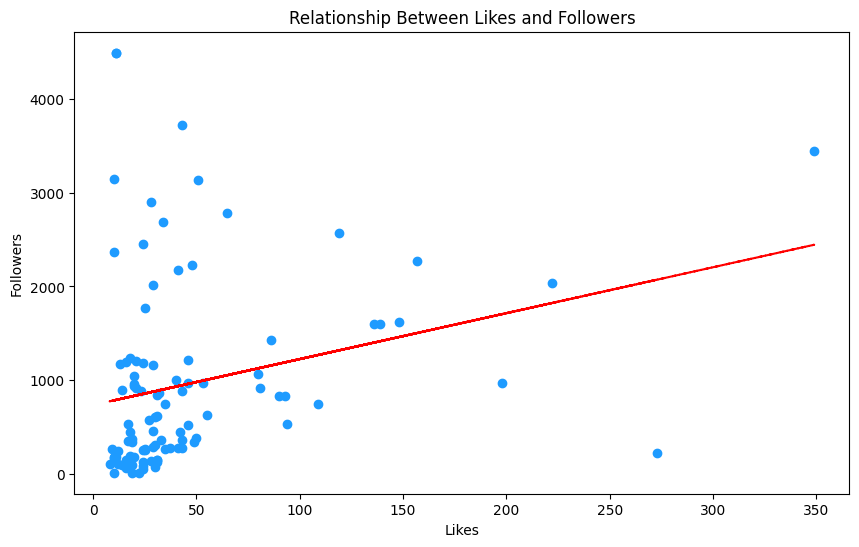

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["Likes"], df["Followers"], color='#1E9BFF')

z = np.polyfit(df["Likes"], df["Followers"], 1)
p = np.poly1d(z)
ax.plot(df["Likes"],p(df["Likes"]),"r--")

plt.title("Relationship Between Likes and Followers")
plt.xlabel("Likes")
plt.ylabel("Followers")
plt.show()